In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
from IPython.display import display, HTML

In [2]:
sns.set()

In [3]:
pd.set_option('max_colwidth', 115)

In [4]:
OHCO = ['movie_id','scene_id', 'sent_num', 'token_num']
SENTS = OHCO[:3]
SCENES = OHCO[:2]
MOVIES = OHCO[:1]

In [5]:
LIB = pd.read_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/LIB.csv', index_col='movie_id')
CORPUS = pd.read_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/CORPUS.csv').set_index(OHCO)
VOCAB = pd.read_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/VOCAB.csv', index_col = 'term_str')
DOC = pd.read_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/DOC.csv', index_col = 'movie_id')

In [6]:
LIB.head()

,movie_title,source_file_path,year,decade,movie_len,n_scenes
movie_id,,,,,,
0,aliens,/Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/aliens.txt,1985,1980,27022,189
1,americanpsycho,/Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/americanpsy...,2000,2000,20104,57
2,buffythevampireslayer,/Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/buffythevam...,1992,1990,22254,123
3,dragmetohell,/Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/dragmetohel...,2009,2000,17154,75
4,eightleggedfreaks,/Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/imsdb_raw_nov_2015/HorrorSeen/eightlegged...,2002,2000,17418,195


## Bring in BOW and TFIDF Functions

### BOW Function

In [7]:
def create_bag(corpus, bag):
    BOW = corpus.groupby(bag+['term_str']).term_str.count().to_frame('n')
    return BOW

In [8]:
BOW = create_bag(CORPUS, SCENES)

In [9]:
BOW

n
movie_id scene_id term_str    
0        1        a         10
                  airlock    1
                  alive      1
                  and        3
                  angle      1
...                         ..
36       111      open       1
                  out        1
                  quiet      1
                  the        3
                  through    1

[481251 rows x 1 columns]

# Prepare Data

## Get Lexicons

We created this last week.

In [10]:
salex_csv = '/Users/theothormann/Desktop/Data Science/Spring/DS5001/PossibleCorpus/salex_nrc.csv'
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

# Get SA Lexicon

In [11]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [12]:
SALEX

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


In [13]:
VOCAB = VOCAB[['n', 'tfidf', 'max_pos']]

# Compute Sentiment

# Combine SALEX with VOCAB

In [14]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1) #\
    # .reset_index().set_index('term_id')

In [15]:
V.head()

,n,tfidf,max_pos,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,,,,
abandon,5,1.209753,NNP,0,0,0,1,0,1,0,1,0,0,-1
abandoned,24,1.215924,VBN,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0.094479,NN,1,0,0,1,0,1,0,1,1,0,-1
abduction,2,0.914962,NN,0,0,0,1,0,1,0,1,1,0,-1
aberration,1,1.385685,NN,0,0,1,0,0,1,0,0,0,0,-1


# Merge VOCAB with BOW

In [16]:
B = BOW.join(V[['max_pos', 'tfidf'] + emo_cols], on='term_str', rsuffix='_v').dropna()

In [17]:
B

n max_pos     tfidf  anger  anticipation  disgust  \
movie_id scene_id term_str                                                      
0        1        alive     1      JJ  0.450720    0.0           1.0      0.0   
                  armed     1     VBN  0.644574    1.0           0.0      0.0   
                  bizarre   1      JJ  1.009455    0.0           0.0      0.0   
                  crypt     1      NN  1.222125    0.0           0.0      0.0   
                  cutting   2     VBG  0.720959    1.0           0.0      1.0   
...                        ..     ...       ...    ...           ...      ...   
36       110      menacing  1      NN  0.760184    1.0           0.0      0.0   
                  shoulder  1      NN  0.553150    0.0           0.0      0.0   
                  strip     1      NN  0.542468    0.0           0.0      0.0   
                  unable    1      JJ  0.538795    0.0           0.0      0.0   
         111      quiet     1      JJ  0.533905    0.0           0.0      0.0   

                            fear  joy  sadness  surprise  trust  sentiment  
movie_id scene_id term_str                                                  
0        1        alive      0.0  1.0      0.0       0.0    1.0        1.0  
                  armed      1.0  0.0      0.0       0.0    0.0        0.0  
                  bizarre    0.0  0.0      0.0       1.0    0.0       -1.0  
                  crypt      1.0  0.0      1.0       0.0    0.0       -1.0  
                  cutting    1.0  0.0      1.0       0.0    0.0       -1.0  
...                          ...  ...      ...       ...    ...        ...  
36       110      menacing   1.0  0.0      0.0       0.0    0.0       -1.0  
                  shoulder   0.0  0.0      0.0       0.0    1.0        1.0  
                  strip      0.0  0.0      1.0       0.0    0.0       -1.0  
                  unable     0.0  0.0      1.0       0.0    0.0       -1.0  
         111      quiet      0.0  0.0      1.0       0.0    0.0        1.0  

[33967 rows x 12 columns]

# Weight Emotions by TFIDF

In [18]:
for col in emo_cols:
    B[col] = B[col] * B.tfidf

In [19]:
B.head()

n max_pos     tfidf     anger  anticipation  \
movie_id scene_id term_str                                                
0        1        alive     1      JJ  0.450720  0.000000       0.45072   
                  armed     1     VBN  0.644574  0.644574       0.00000   
                  bizarre   1      JJ  1.009455  0.000000       0.00000   
                  crypt     1      NN  1.222125  0.000000       0.00000   
                  cutting   2     VBG  0.720959  0.720959       0.00000   

                             disgust      fear      joy   sadness  surprise  \
movie_id scene_id term_str                                                    
0        1        alive     0.000000  0.000000  0.45072  0.000000  0.000000   
                  armed     0.000000  0.644574  0.00000  0.000000  0.000000   
                  bizarre   0.000000  0.000000  0.00000  0.000000  1.009455   
                  crypt     0.000000  1.222125  0.00000  1.222125  0.000000   
                  cutting   0.720959  0.720959  0.00000  0.720959  0.000000   

                              trust  sentiment  
movie_id scene_id term_str                      
0        1        alive     0.45072   0.450720  
                  armed     0.00000   0.000000  
                  bizarre   0.00000  -1.009455  
                  crypt     0.00000  -1.222125  
                  cutting   0.00000  -0.720959

# Explore Emotion Words and POS

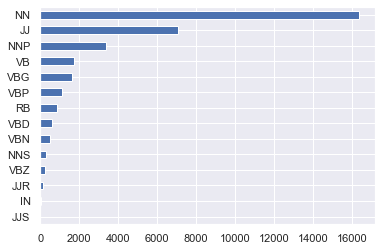

In [20]:
B.max_pos.value_counts().sort_values().plot.barh();

In [21]:
EMO_MOVIES = B.groupby(['movie_id'])[emo_cols].mean()
EMO_CHAPS = B.groupby(['movie_id','scene_id'])[emo_cols].mean()

In [22]:
EMO_MOVIES.index = LIB.movie_title #book_title

In [23]:
EMO_MOVIES_sentiment = EMO_MOVIES.loc[:, ['sentiment']]
EMO_MOVIES_sentiment

,sentiment
movie_title,
aliens,-0.350713
americanpsycho,-0.045534
buffythevampireslayer,-0.137568
dragmetohell,-0.095667
eightleggedfreaks,-0.264935
finaldestination,-0.193021
freddyvs.jason,-0.202889
fridaythe13thpartviiijasontakesmanhattan,-0.266130
ghostship,-0.078537


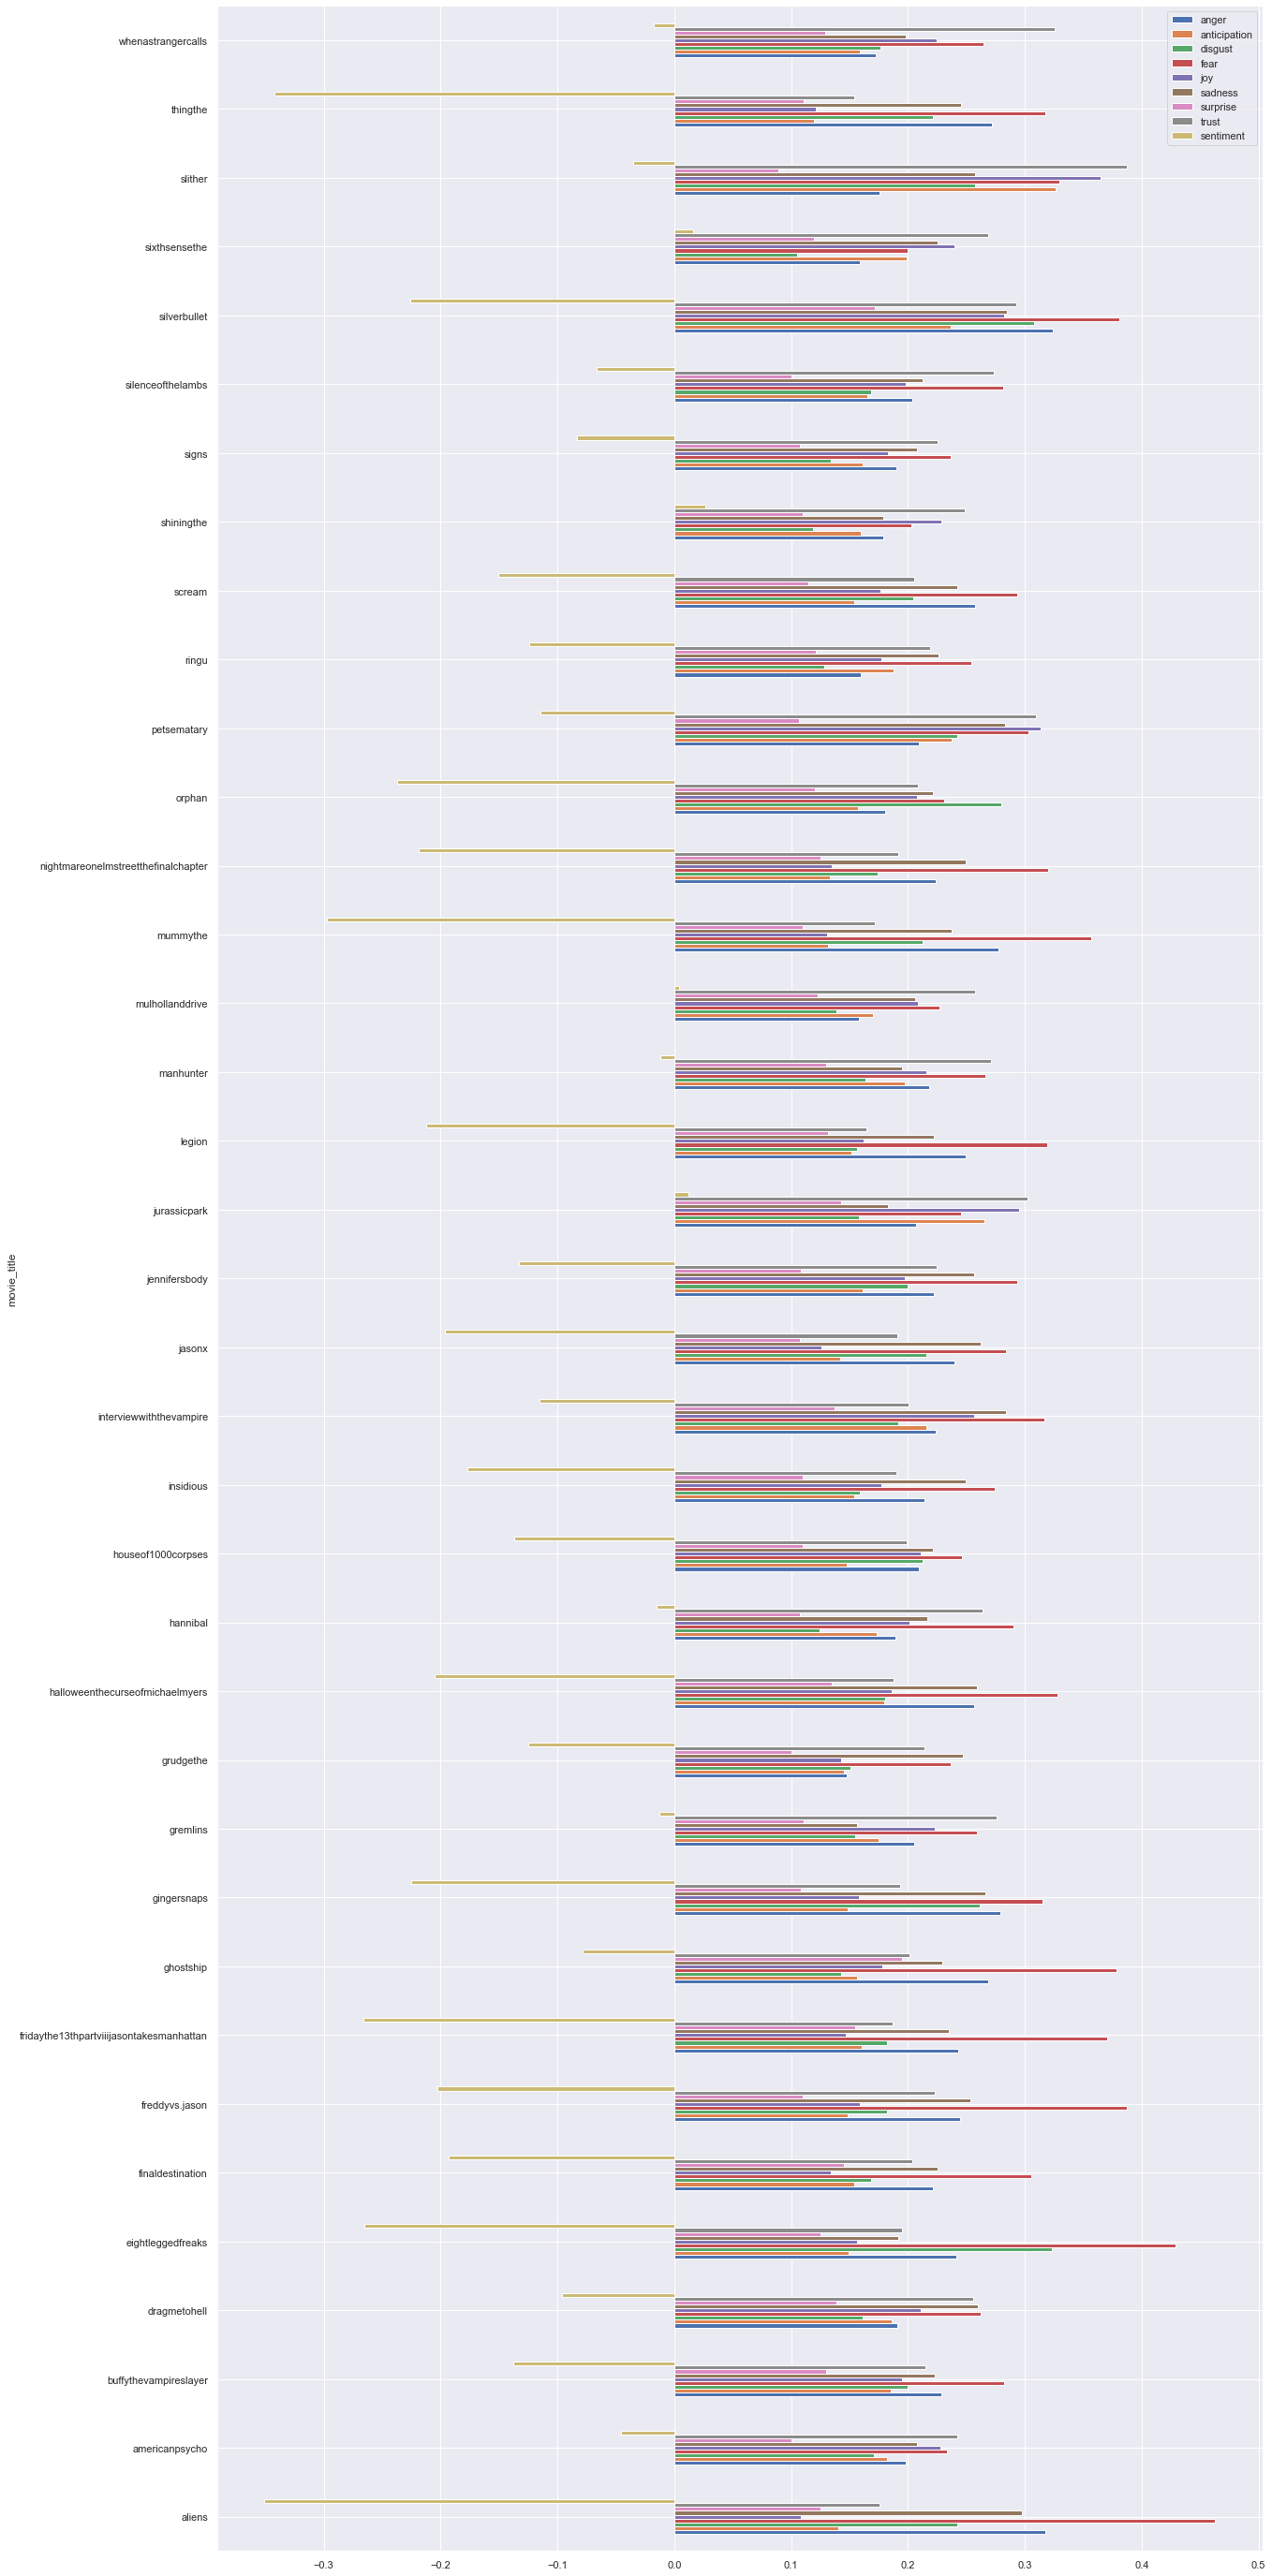

In [24]:
EMO_MOVIES.plot.barh(figsize=(20,50));

In [25]:
EMO_MOVIES_sentiment.to_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/sentiment_polarity.csv')

In [26]:
EMO_MOVIES.to_csv('/Users/theothormann/Desktop/Data Science/Spring/DS5001/FinalData/emotions.csv')